# Name: Gullas Rainer L.

# Section: BSCPE32S3

#Date Perfomred: 04/02/2024

#Date Submitted: 04/02/2024

#Instructor: Engr. Roman Richard

# Activity 6.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


In [ ]:
from google.colab import files
files.upload()

#### Procedures

Load the necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [5]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [6]:

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [7]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
536,0,105,90,0,0,29.6,0.197,46,0
674,8,91,82,0,0,35.6,0.587,68,0
589,0,73,0,0,0,21.1,0.342,25,0
27,1,97,66,15,140,23.2,0.487,22,0
184,4,141,74,0,0,27.6,0.244,40,0


In [8]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [9]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [11]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [12]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [13]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [14]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [15]:

model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 14ms/step - loss: 0.6859 - accuracy: 0.5799 - val_loss: 0.6795 - val_accuracy: 0.5885
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6704 - accuracy: 0.6042 - val_loss: 0.6651 - val_accuracy: 0.6146
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6564 - accuracy: 0.6146 - val_loss: 0.6522 - val_accuracy: 0.6406
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6435 - accuracy: 0.6389 - val_loss: 0.6406 - val_accuracy: 0.6458
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6320 - accuracy: 0.6493 - val_loss: 0.6302 - val_accuracy: 0.6667
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6214 - accuracy: 0.6545 - val_loss: 0.6209 - val_accuracy: 0.6823
Epoch 7/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6116 - accuracy: 0.6667 - val_loss: 0.6126 - val_accuracy: 0.6875
Epoch 8/200


In [50]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = model.predict(X_test_norm)
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 5ms/step


In [51]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0.05151687],
       [0.33694816],
       [0.3720943 ],
       [0.22370118],
       [0.5326897 ],
       [0.34477696],
       [0.318967  ],
       [0.3697302 ],
       [0.05910133],
       [0.24207284]], dtype=float32)

In [52]:
y_pred_prob_nn_1[:10]

array([[0.05151687],
       [0.33694816],
       [0.3720943 ],
       [0.22370118],
       [0.5326897 ],
       [0.34477696],
       [0.318967  ],
       [0.3697302 ],
       [0.05910133],
       [0.24207284]], dtype=float32)

Create the plot_roc function

In [53]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

In [54]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

ValueError: Classification metrics can't handle a mix of binary and continuous targets

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [55]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

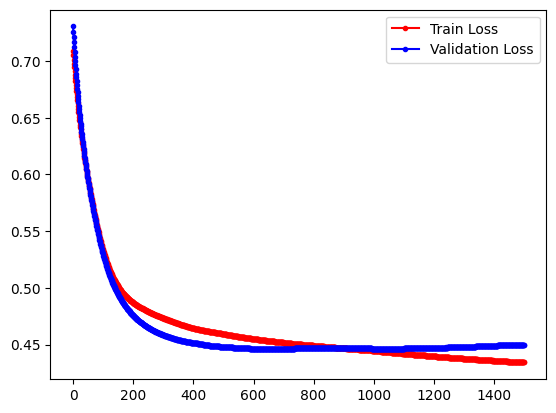

In [56]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?


# base on the result of the result of the train and validation loss since its in a downward trend and doing some research on what is the meaning of this it is said that if it is in a downward trend is that the model is learning and improving its performance over epochs. This is a desirable behavior during the training phase of a machine learning model.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [22]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50000)

In [24]:
  np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

In [25]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [33]:
model  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 54        
                                                                 
 dense_7 (Dense)             (None, 6)                 42        
                                                                 
 dense_8 (Dense)             (None, 2)                 14        
                                                                 
Total params: 110 (440.00 Byte)
Trainable params: 110 (440.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.compile(SGD(learning_rate=0.003), "binary_crossentropy", metrics=["accuracy"])

run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 2s 19ms/step - loss: 0.7087 - accuracy: 0.5365 - val_loss: 0.7305 - val_accuracy: 0.4844
Epoch 2/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.7049 - accuracy: 0.5503 - val_loss: 0.7256 - val_accuracy: 0.5052
Epoch 3/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.7013 - accuracy: 0.5573 - val_loss: 0.7210 - val_accuracy: 0.5208
Epoch 4/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.6978 - accuracy: 0.5677 - val_loss: 0.7165 - val_accuracy: 0.5208
Epoch 5/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.5729 - val_loss: 0.7122 - val_accuracy: 0.5156
Epoch 6/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.5781 - val_loss: 0.7080 - val_accuracy: 0.5260
Epoch 7/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6881 - accuracy: 0.5885 - val_loss: 0.7039 - val_accuracy: 0.5312
Epoch

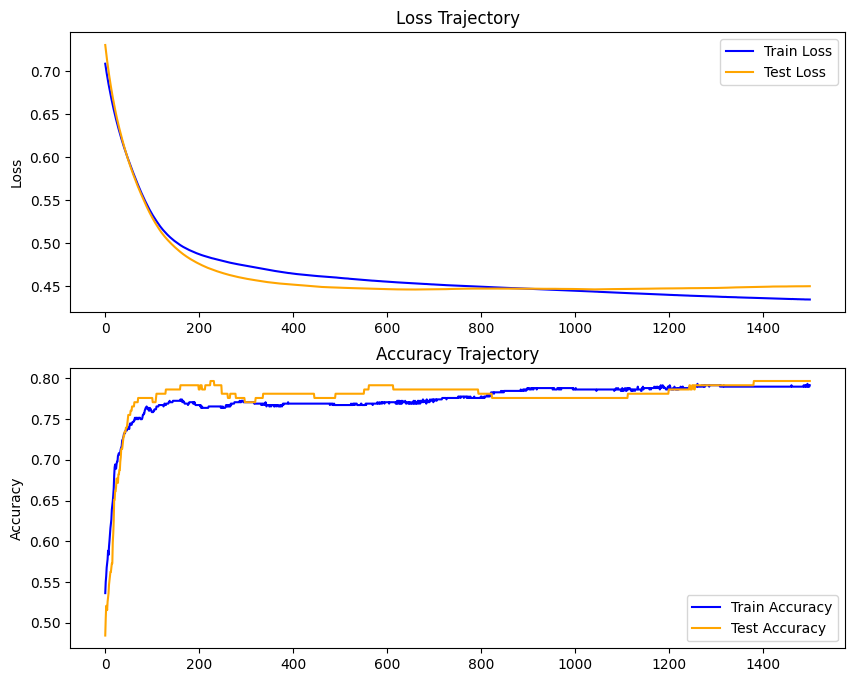

In [44]:
train_loss = run_hist_1.history['loss']
test_loss = run_hist_1.history['val_loss']
train_accuracy = run_hist_1.history['accuracy']
test_accuracy = run_hist_1.history['val_accuracy']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

axes[1].plot(train_accuracy, label='Train Accuracy', color='blue')
axes[1].plot(test_accuracy, label='Test Accuracy', color='orange')
axes[1].set_title('Accuracy Trajectory')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

axes[0].plot(train_loss, label='Train Loss', color='blue')
axes[0].plot(test_loss, label='Test Loss', color='orange')
axes[0].set_title('Loss Trajectory')
axes[0].set_ylabel('Loss')
axes[0].legend()

6/6 [==============================] - 0s 3ms/step


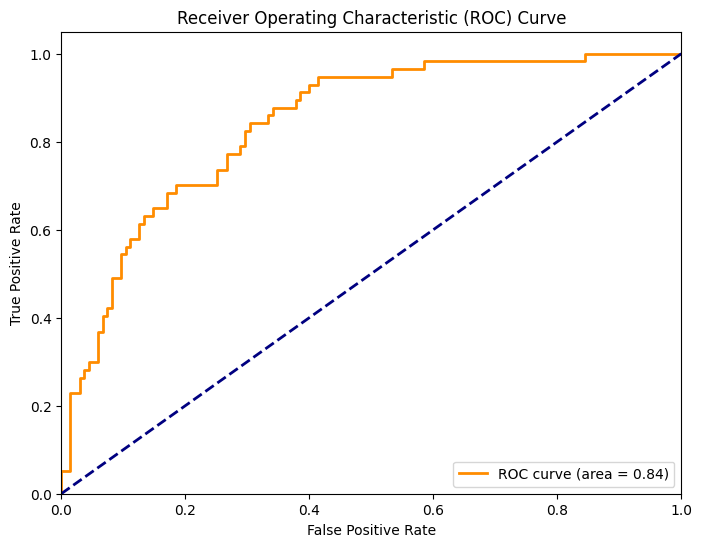

In [46]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict(X_test_norm)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [57]:
model  = Sequential([
    Dense(20, input_shape=(8,), activation="relu"),
    Dense(20, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [58]:
model.compile(SGD(learning_rate=0.5), "binary_crossentropy", metrics=["accuracy"])

run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=2000)

Epoch 1/2000
18/18 [==============================] - 1s 18ms/step - loss: 0.6090 - accuracy: 0.6615 - val_loss: 0.4472 - val_accuracy: 0.7760
Epoch 2/2000
18/18 [==============================] - 0s 6ms/step - loss: 0.4955 - accuracy: 0.7622 - val_loss: 0.4615 - val_accuracy: 0.7812
Epoch 3/2000
18/18 [==============================] - 0s 5ms/step - loss: 0.4939 - accuracy: 0.7569 - val_loss: 0.4289 - val_accuracy: 0.8177
Epoch 4/2000
18/18 [==============================] - 0s 5ms/step - loss: 0.4794 - accuracy: 0.7726 - val_loss: 0.4277 - val_accuracy: 0.7969
Epoch 5/2000
18/18 [==============================] - 0s 5ms/step - loss: 0.4735 - accuracy: 0.7795 - val_loss: 0.4394 - val_accuracy: 0.7917
Epoch 6/2000
18/18 [==============================] - 0s 5ms/step - loss: 0.4710 - accuracy: 0.7830 - val_loss: 0.4355 - val_accuracy: 0.8073
Epoch 7/2000
18/18 [==============================] - 0s 5ms/step - loss: 0.4662 - accuracy: 0.7760 - val_loss: 0.4240 - val_accuracy: 0.7760
Epoch

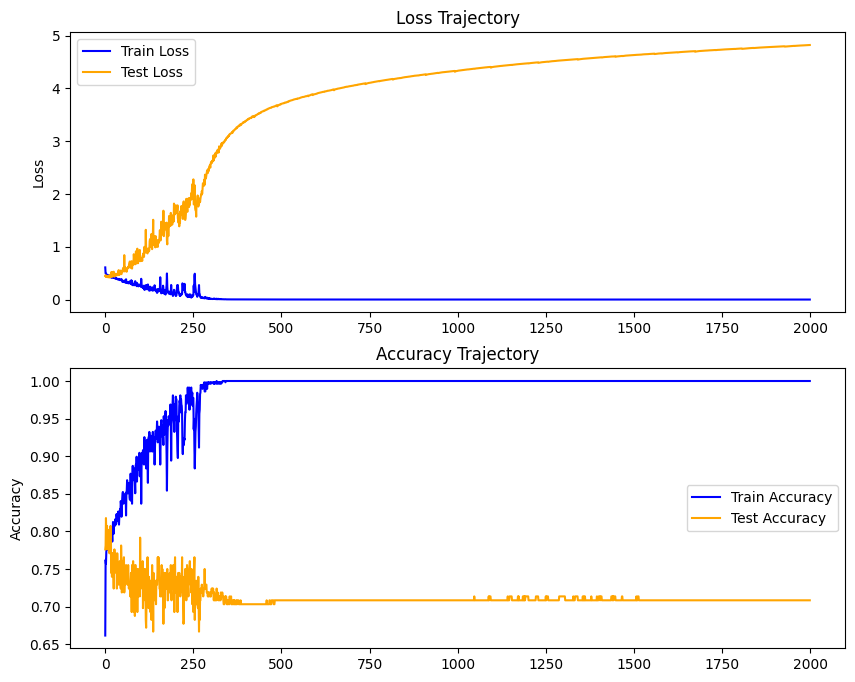

In [59]:
train_loss = run_hist_1.history['loss']
test_loss = run_hist_1.history['val_loss']
train_accuracy = run_hist_1.history['accuracy']
test_accuracy = run_hist_1.history['val_accuracy']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

axes[1].plot(train_accuracy, label='Train Accuracy', color='blue')
axes[1].plot(test_accuracy, label='Test Accuracy', color='orange')
axes[1].set_title('Accuracy Trajectory')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

axes[0].plot(train_loss, label='Train Loss', color='blue')
axes[0].plot(test_loss, label='Test Loss', color='orange')
axes[0].set_title('Loss Trajectory')
axes[0].set_ylabel('Loss')
axes[0].legend()

6/6 [==============================] - 0s 2ms/step


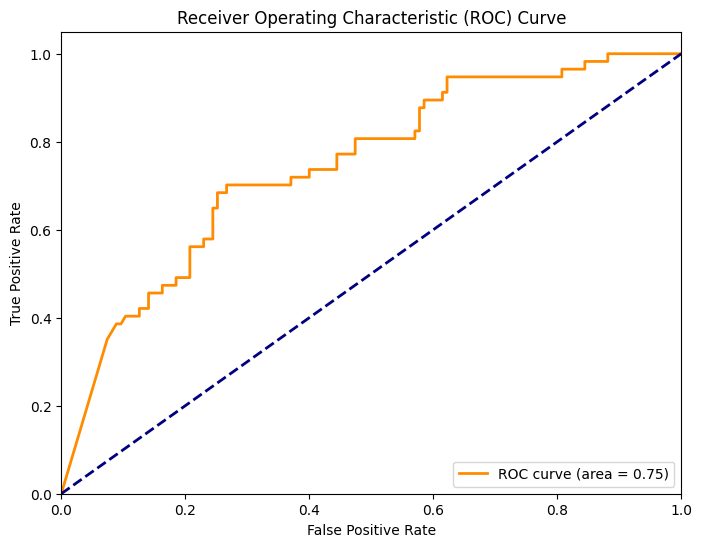

In [60]:
y_pred_proba = model.predict(X_test_norm)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Conclusion

#in this activity I learned some in the training of the neural networks especially how the model handles different kind of weights and biases